<a href="https://colab.research.google.com/github/lorenzo-stacchio/Deep-Learning-and-Computer-Vision-for-Business/blob/main/02-Pytorch%20and%20CV/Yolo/Train_yolo_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO on a custom Object Detection Dataset

Ultralytics is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Oct 24 18:43:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Ultralytics


In [1]:
! pip install ultralytics

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Download a model

In [5]:
! wget https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt

--2025-10-03 08:26:41--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/34b70ade-b6eb-4179-a60f-d6494307226b?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-03T09%3A20%3A54Z&rscd=attachment%3B+filename%3Dyolo11n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-03T08%3A19%3A59Z&ske=2025-10-03T09%3A20%3A54Z&sks=b&skv=2018-11-09&sig=OieiVjp61ha4kVwbmG5McHThkwmvPmi0I0RsQFjVeUA%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1OTQ4MDE4OSwibmJmIjoxNzU5NDc5ODg5LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvcmUud

In [10]:
! wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-10-03 08:28:02--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-10-03 08:28:03 (70.9 MB/s) - ‘dog.jpeg’ saved [106055/106055]



## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [13]:
model = YOLO(f'/content/yolo11n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 49.4ms
Speed: 12.0ms preprocess, 49.4ms inference, 308.1ms postprocess per image at shape (1, 3, 640, 384)


In [14]:
results[0].boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [15]:
results[0].boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [16]:
results[0].boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

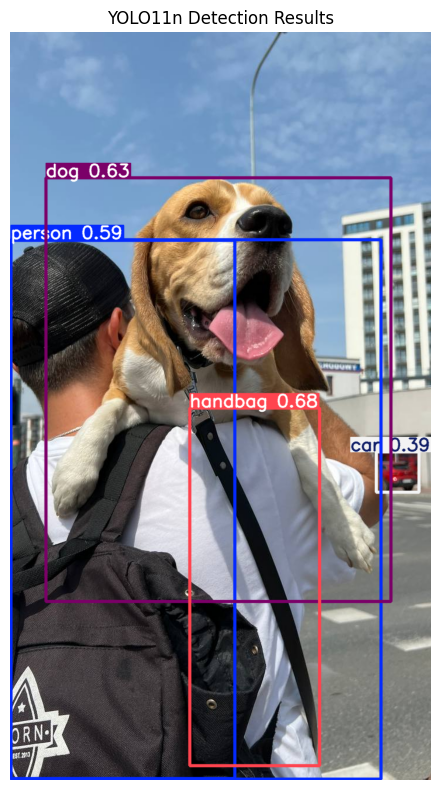

In [22]:
from matplotlib import pyplot as plt
from PIL import Image

for result in results:
    # Plot results
    im_array = result.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image

# Display
plt.figure(figsize=(12, 8))
plt.imshow(im)
plt.axis('off')
plt.title('YOLO11n Detection Results')
plt.tight_layout()
plt.show()


Method 2: Custom Visualization with Detection Info

Total detections: 5
------------------------------------------------------------
Detection 1:
  Class: handbag
  Confidence: 68.32%
  BBox: [307.0, 643.4, 529.2, 1255.8]

Detection 2:
  Class: dog
  Confidence: 62.84%
  BBox: [61.4, 249.9, 651.7, 974.1]

Detection 3:
  Class: person
  Confidence: 59.41%
  BBox: [1.8, 355.5, 634.0, 1278.8]

Detection 4:
  Class: person
  Confidence: 39.23%
  BBox: [1.2, 356.2, 384.6, 1277.6]

Detection 5:
  Class: car
  Confidence: 38.75%
  BBox: [626.2, 718.2, 699.8, 787.5]



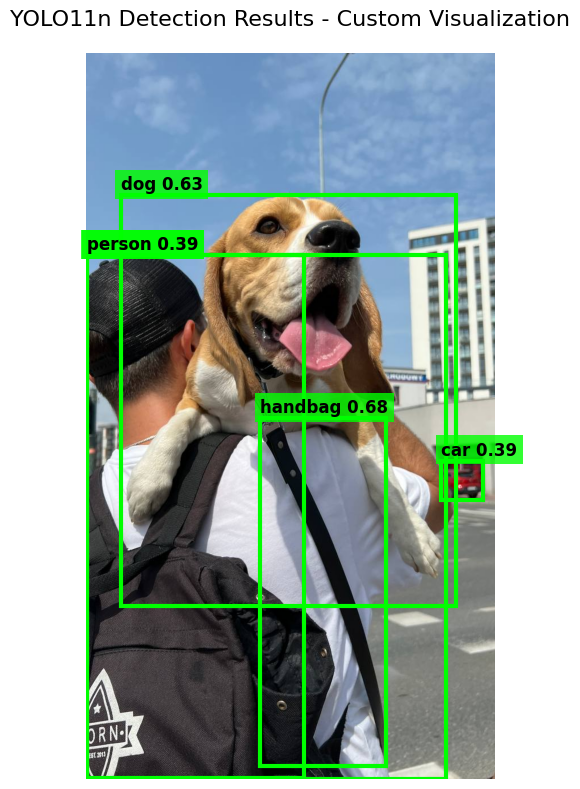

In [24]:
import cv2

# Method 2: Detailed - Access detection data and create custom visualization
print("\nMethod 2: Custom Visualization with Detection Info")
for result in results:
    # Get original image
    img = result.orig_img
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(img_rgb)

    # Get detection boxes
    boxes = result.boxes

    # Print detection summary
    print(f"\nTotal detections: {len(boxes)}")
    print("-" * 60)

    # Draw each detection
    for i, box in enumerate(boxes):
        # Get box coordinates (xyxy format)
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # Get confidence and class
        conf = box.conf[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        class_name = model.names[cls]

        # Print detection info
        print(f"Detection {i+1}:")
        print(f"  Class: {class_name}")
        print(f"  Confidence: {conf:.2%}")
        print(f"  BBox: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")
        print()

        # Draw bounding box
        rect = plt.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            fill=False,
            edgecolor='lime',
            linewidth=3
        )
        ax.add_patch(rect)

        # Add label
        label = f'{class_name} {conf:.2f}'
        ax.text(
            x1, y1-10,
            label,
            bbox=dict(facecolor='lime', alpha=0.8, edgecolor='none'),
            fontsize=12,
            color='black',
            weight='bold'
        )

    ax.axis('off')
    plt.title('YOLO11n Detection Results - Custom Visualization', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# Fine-Tuning


STEP 1: PREPARE YOUR DATASET

dataset/
├── train/
│ ├── images/
│ └── labels/
├── val/
│ ├── images/
│ └── labels/
└── data.yaml

## Download datase and convert

In [31]:
! pip install gdown

In [47]:
# Install gdown if not already installed
import gdown

# Google Drive file ID
file_id = "1phlY3ZD1frAx1wy-dRZKvicA7psS41LA"
output = "Holoselecta.zip"

# Download
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

print("Download completed:", output)

Downloading...
From (original): https://drive.google.com/uc?id=1phlY3ZD1frAx1wy-dRZKvicA7psS41LA
From (redirected): https://drive.google.com/uc?id=1phlY3ZD1frAx1wy-dRZKvicA7psS41LA&confirm=t&uuid=acfb818d-fa8b-487e-b4ac-38ecc06b4fe2
To: /content/Holoselecta.zip


  0%|          | 0.00/2.72G [00:00<?, ?B/s]

  0%|          | 1.05M/2.72G [00:00<04:25, 10.2MB/s]

  0%|          | 13.1M/2.72G [00:00<00:36, 74.0MB/s]

  1%|          | 29.9M/2.72G [00:00<00:23, 114MB/s] 

  2%|▏         | 46.7M/2.72G [00:00<00:19, 135MB/s]

  2%|▏         | 62.9M/2.72G [00:00<00:18, 145MB/s]

  3%|▎         | 79.7M/2.72G [00:00<00:17, 151MB/s]

  4%|▎         | 95.9M/2.72G [00:00<00:17, 154MB/s]

  4%|▍         | 112M/2.72G [00:01<00:28, 92.8MB/s]

  5%|▍         | 124M/2.72G [00:01<00:33, 77.4MB/s]

  5%|▍         | 135M/2.72G [00:01<00:39, 66.2MB/s]

  5%|▌         | 143M/2.72G [00:01<00:41, 61.7MB/s]

  6%|▌         | 152M/2.72G [00:01<00:39, 65.6MB/s]

  6%|▌         | 159M/2.72G [00:01<00:37, 67.8MB/s]


Download completed: Holoselecta.zip


In [49]:
! unzip /content/Holoselecta.zip

Archive:  /content/Holoselecta.zip
replace FinalDataset/20190103_103704.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FinalDataset/20190103_103704.jpg  
  inflating: FinalDataset/20190103_103704.xml  
  inflating: FinalDataset/20190111_111600_HoloLens.jpg  
  inflating: FinalDataset/20190111_111600_HoloLens.xml  
  inflating: FinalDataset/20190111_111611_HoloLens.jpg  
  inflating: FinalDataset/20190111_111611_HoloLens.xml  
  inflating: FinalDataset/20190111_111616_HoloLens.jpg  
  inflating: FinalDataset/20190111_111616_HoloLens.xml  
  inflating: FinalDataset/20190111_111623_HoloLens.jpg  
  inflating: FinalDataset/20190111_111623_HoloLens.xml  
  inflating: FinalDataset/20190111_111631_HoloLens.jpg  
  inflating: FinalDataset/20190111_111631_HoloLens.xml  
  inflating: FinalDataset/20190111_111641_HoloLens.jpg  
  inflating: FinalDataset/20190111_111641_HoloLens.xml  
  inflating: FinalDataset/20190111_111648_HoloLens.jpg  
  inflating: FinalDataset/20190111_111648_Holo

  3%|▎         | 83.9M/2.72G [02:33<1:20:20, 547kB/s]

Pascal VOC XML to YOLO Format Converter

Configuration:
  Source folder: /content/FinalDataset/
  Output folder: /content/FinalDataset_yolo/
  Train/Val split: 80%/20%

Starting conversion...

Dataset split:
  Training: 236 images
  Validation: 59 images
Scanning 295 XML files for classes...

Found 115 unique classes:
  0: 7days_croissantschoko_packung_80_1_0000000000003
  1: airwaves_menthoneucalyptus_riegel_14_1_50173167
  2: b_tarteaupomme____
  3: balisto_muesli__37g__5000159418546
  4: balisto_yoberry__37g__
  5: berger_???____
  6: berger____
  7: berger_bruensli____
  8: berger_brunsli___
  9: berger_mailaenderli____7610404550006
  10: berger_nusstoertli____
  11: berger_schoggitoertli____
  12: berger_spitzbueb___
  13: berger_spitzbueb____
  14: berger_vogelnestli____
  15: bifi_roll__50__4251097402635
  16: bounty_____
  17: branche_maxi____
  18: bueno___43__4008400320328
  19: c+swiss_dosenabisicetea__33_
  20: c+swiss_dosenabisicetea__33__9120025930135
  21: caferoyal_clas


Processing validation set...

Conversion complete!
  Successfully converted 236/236 training samples
  Successfully converted 59/59 validation samples

Created data.yaml at: /content/FinalDataset_yolo/data.yaml

Saved class mapping to: /content/FinalDataset_yolo/class_mapping.txt

Verifying conversion...

Verifying 3 random samples:

IMG_20190430_105808.jpg:
  Objects: 44
    - zweifel_paprika__90__7610095013002
    - zweifel_graneochilli__100__7610095184009
    - stimorol_wildcherry_riegel_14_1_57060330
    - stimorol_spearmint_riegel_14_1_0000000000005
    - airwaves_menthoneucalyptus_riegel_14_1_50173167
    - skittles_sour_riegel_51_1_0000000000004
    - jlbrichard_gauffre__90__5410495002000
    - fini_galaxymix_packung_100_1_8410525150364
    - jacklinks_beefjerkyorginal__25__4047751730219
    - maltesers___100__5000159023061
    - mnms_gelb__45__40111445
    - twix___50__5000159459228
    - fini_jellykisses_packung_80_1_8410525116704
    - knoppers_riegel____4035800488808
    - 

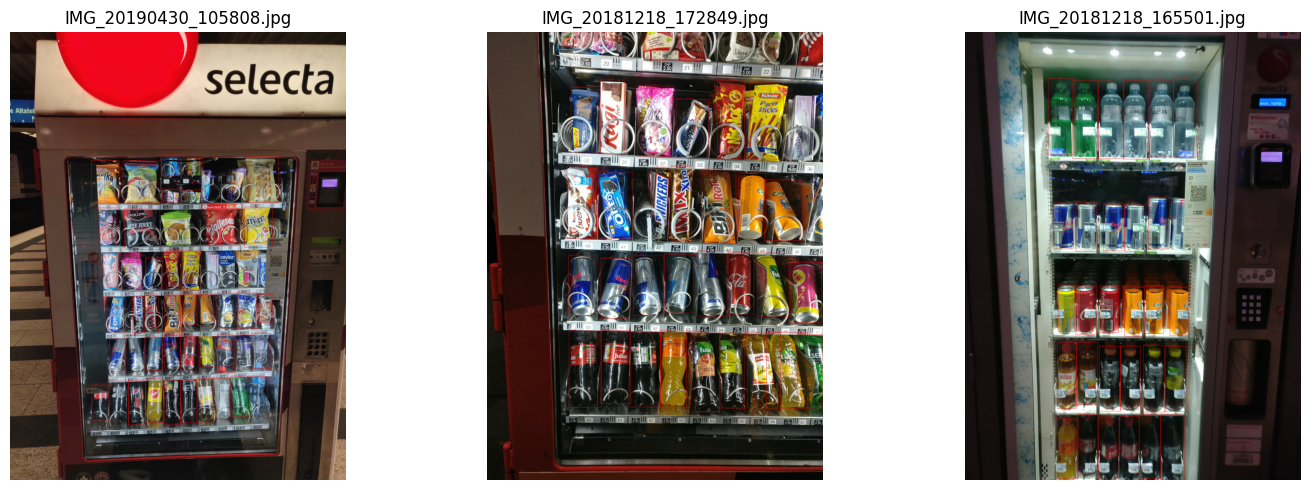


CONVERSION COMPLETE!

Your YOLO dataset is ready at: /content/FinalDataset_yolo/
Total images converted: 295

Next steps:
1. Review the verification images
2. Check data.yaml at: /content/FinalDataset_yolo//data.yaml
3. Use this path in your training script:
   data='/content/FinalDataset_yolo//data.yaml'


In [50]:
import os
import xml.etree.ElementTree as ET
from pathlib import Path
import yaml
from collections import defaultdict

def parse_xml_annotation(xml_path):
    """
    Parse Pascal VOC XML annotation file

    Returns:
        image_info: dict with width, height, filename
        objects: list of dicts with name and bbox coordinates
    """
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Get image dimensions
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    filename = root.find('filename').text

    # Get all objects
    objects = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')

        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        objects.append({
            'name': name,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return {
        'width': width,
        'height': height,
        'filename': filename
    }, objects


def convert_bbox_to_yolo(bbox, img_width, img_height):
    """
    Convert Pascal VOC bbox to YOLO format

    Pascal VOC: [xmin, ymin, xmax, ymax] (absolute coordinates)
    YOLO: [x_center, y_center, width, height] (normalized 0-1)
    """
    xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']

    # Calculate center coordinates
    x_center = (xmin + xmax) / 2.0
    y_center = (ymin + ymax) / 2.0

    # Calculate width and height
    w = xmax - xmin
    h = ymax - ymin

    # Normalize to [0, 1]
    x_center_norm = x_center / img_width
    y_center_norm = y_center / img_height
    w_norm = w / img_width
    h_norm = h / img_height

    return x_center_norm, y_center_norm, w_norm, h_norm


def create_class_mapping(xml_folder):
    """
    Scan all XML files and create a class mapping
    Returns a dict: {class_name: class_id}
    """
    classes = set()

    xml_files = list(Path(xml_folder).glob('*.xml'))
    print(f"Scanning {len(xml_files)} XML files for classes...")

    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()

            for obj in root.findall('object'):
                class_name = obj.find('name').text
                classes.add(class_name)
        except Exception as e:
            print(f"Error reading {xml_file}: {e}")

    # Sort classes alphabetically for consistency
    classes = sorted(list(classes))

    # Create mapping
    class_mapping = {name: idx for idx, name in enumerate(classes)}

    print(f"\nFound {len(classes)} unique classes:")
    for name, idx in sorted(class_mapping.items(), key=lambda x: x[1]):
        print(f"  {idx}: {name}")

    return class_mapping


def convert_xml_to_yolo(xml_path, output_path, class_mapping):
    """
    Convert single XML file to YOLO format txt file
    """
    try:
        img_info, objects = parse_xml_annotation(xml_path)

        if not objects:
            print(f"Warning: No objects found in {xml_path}")
            return False

        # Create YOLO format annotations
        yolo_annotations = []
        for obj in objects:
            class_name = obj['name']

            if class_name not in class_mapping:
                print(f"Warning: Unknown class '{class_name}' in {xml_path}")
                continue

            class_id = class_mapping[class_name]

            # Convert bbox to YOLO format
            x_center, y_center, w, h = convert_bbox_to_yolo(
                obj, img_info['width'], img_info['height']
            )

            # YOLO format: class_id x_center y_center width height
            yolo_annotations.append(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

        # Write to file
        with open(output_path, 'w') as f:
            f.write('\n'.join(yolo_annotations))

        return True

    except Exception as e:
        print(f"Error converting {xml_path}: {e}")
        return False


def organize_dataset(source_folder, output_folder, train_split=0.8):
    """
    Organize dataset into YOLO structure with train/val split

    Dataset structure:
    output_folder/
    ├── images/
    │   ├── train/
    │   └── val/
    ├── labels/
    │   ├── train/
    │   └── val/
    └── data.yaml
    """
    import shutil
    import random

    source_path = Path(source_folder)
    output_path = Path(output_folder)

    # Create directory structure
    for split in ['train', 'val']:
        (output_path / 'images' / split).mkdir(parents=True, exist_ok=True)
        (output_path / 'labels' / split).mkdir(parents=True, exist_ok=True)

    # Get all XML files
    xml_files = list(source_path.glob('*.xml'))

    # Shuffle and split
    random.seed(42)
    random.shuffle(xml_files)

    train_size = int(len(xml_files) * train_split)
    train_files = xml_files[:train_size]
    val_files = xml_files[train_size:]

    print(f"\nDataset split:")
    print(f"  Training: {len(train_files)} images")
    print(f"  Validation: {len(val_files)} images")

    # Create class mapping
    class_mapping = create_class_mapping(source_folder)

    # Process files
    def process_split(files, split_name):
        success_count = 0
        for xml_file in files:
            # Find corresponding image file
            img_name = xml_file.stem
            img_file = None

            for ext in ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']:
                potential_img = source_path / f"{img_name}{ext}"
                if potential_img.exists():
                    img_file = potential_img
                    break

            if img_file is None:
                print(f"Warning: Image not found for {xml_file.name}")
                continue

            # Convert XML to YOLO format
            output_label = output_path / 'labels' / split_name / f"{img_name}.txt"
            if convert_xml_to_yolo(xml_file, output_label, class_mapping):
                # Copy image to appropriate folder
                output_img = output_path / 'images' / split_name / img_file.name
                shutil.copy2(img_file, output_img)
                success_count += 1

        return success_count

    print(f"\nProcessing training set...")
    train_success = process_split(train_files, 'train')

    print(f"\nProcessing validation set...")
    val_success = process_split(val_files, 'val')

    print(f"\nConversion complete!")
    print(f"  Successfully converted {train_success}/{len(train_files)} training samples")
    print(f"  Successfully converted {val_success}/{len(val_files)} validation samples")

    # Create data.yaml
    data_yaml = {
        'path': str(output_path.absolute()),
        'train': 'images/train',
        'val': 'images/val',
        'nc': len(class_mapping),
        'names': {idx: name for name, idx in class_mapping.items()}
    }

    yaml_path = output_path / 'data.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(data_yaml, f, default_flow_style=False, sort_keys=False)

    print(f"\nCreated data.yaml at: {yaml_path}")

    return class_mapping, train_success + val_success


def verify_conversion(dataset_folder, num_samples=5):
    """
    Verify the conversion by checking a few samples
    """
    import random
    from PIL import Image, ImageDraw
    import matplotlib.pyplot as plt

    dataset_path = Path(dataset_folder)

    # Load class names from data.yaml
    with open(dataset_path / 'data.yaml', 'r') as f:
        data = yaml.safe_load(f)

    class_names = data['names']

    # Get random samples from training set
    label_files = list((dataset_path / 'labels' / 'train').glob('*.txt'))
    samples = random.sample(label_files, min(num_samples, len(label_files)))

    print(f"\nVerifying {len(samples)} random samples:")

    fig, axes = plt.subplots(1, len(samples), figsize=(5*len(samples), 5))
    if len(samples) == 1:
        axes = [axes]

    for idx, label_file in enumerate(samples):
        # Find corresponding image
        img_name = label_file.stem
        img_file = None
        for ext in ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']:
            potential_img = dataset_path / 'images' / 'train' / f"{img_name}{ext}"
            if potential_img.exists():
                img_file = potential_img
                break

        if img_file is None:
            continue

        # Load image
        img = Image.open(img_file)
        img_width, img_height = img.size
        draw = ImageDraw.Draw(img)

        # Read YOLO annotations
        with open(label_file, 'r') as f:
            lines = f.readlines()

        print(f"\n{img_file.name}:")
        print(f"  Objects: {len(lines)}")

        # Draw bounding boxes
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, w, h = map(float, parts[1:])

            # Convert back to pixel coordinates
            x_center_px = x_center * img_width
            y_center_px = y_center * img_height
            w_px = w * img_width
            h_px = h * img_height

            xmin = int(x_center_px - w_px / 2)
            ymin = int(y_center_px - h_px / 2)
            xmax = int(x_center_px + w_px / 2)
            ymax = int(y_center_px + h_px / 2)

            # Draw rectangle
            draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)
            draw.text((xmin, ymin-15), class_names[class_id], fill='red')

            print(f"    - {class_names[class_id]}")

        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(img_file.name)

    plt.tight_layout()
    plt.savefig(dataset_path / 'verification.png', dpi=150, bbox_inches='tight')
    print(f"\nSaved verification image to: {dataset_path / 'verification.png'}")
    plt.show()


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("="*70)
    print("Pascal VOC XML to YOLO Format Converter")
    print("="*70)

    # Configuration
    SOURCE_FOLDER = '/content/FinalDataset/'  # Folder with XML and image files
    OUTPUT_FOLDER = '/content/FinalDataset_yolo/'  # Output folder for YOLO format
    TRAIN_SPLIT = 0.8  # 80% train, 20% validation

    print(f"\nConfiguration:")
    print(f"  Source folder: {SOURCE_FOLDER}")
    print(f"  Output folder: {OUTPUT_FOLDER}")
    print(f"  Train/Val split: {TRAIN_SPLIT:.0%}/{1-TRAIN_SPLIT:.0%}")

    # Check if source folder exists
    if not os.path.exists(SOURCE_FOLDER):
        print(f"\nError: Source folder not found: {SOURCE_FOLDER}")
        print("Please update SOURCE_FOLDER path in the script")
        exit(1)

    # Run conversion
    print("\n" + "="*70)
    print("Starting conversion...")
    print("="*70)

    class_mapping, total_converted = organize_dataset(
        SOURCE_FOLDER,
        OUTPUT_FOLDER,
        train_split=TRAIN_SPLIT
    )

    # Save class mapping for reference
    mapping_file = Path(OUTPUT_FOLDER) / 'class_mapping.txt'
    with open(mapping_file, 'w') as f:
        for name, idx in sorted(class_mapping.items(), key=lambda x: x[1]):
            f.write(f"{idx}: {name}\n")

    print(f"\nSaved class mapping to: {mapping_file}")

    # Verify conversion
    print("\n" + "="*70)
    print("Verifying conversion...")
    print("="*70)

    try:
        verify_conversion(OUTPUT_FOLDER, num_samples=3)
    except Exception as e:
        print(f"Verification skipped: {e}")

    print("\n" + "="*70)
    print("CONVERSION COMPLETE!")
    print("="*70)
    print(f"\nYour YOLO dataset is ready at: {OUTPUT_FOLDER}")
    print(f"Total images converted: {total_converted}")
    print(f"\nNext steps:")
    print(f"1. Review the verification images")
    print(f"2. Check data.yaml at: {OUTPUT_FOLDER}/data.yaml")
    print(f"3. Use this path in your training script:")
    print(f"   data='{OUTPUT_FOLDER}/data.yaml'")
    print("="*70)

## Prepare configuration file

## Load model

In [52]:
model_name = 'yolo11n.pt'  # Change as needed
model = YOLO(model_name)

print(f"Loaded model: {model_name}")
print(f"Model summary:")
model.info()

Loaded model: yolo11n.pt
Model summary:
YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

## Prepare training configuration

In [53]:
training_args = {
    # Data
    'data': "/content/FinalDataset_yolo/data.yaml",

    # Training duration
    'epochs': 100,              # Number of training epochs
    'patience': 50,             # Early stopping patience

    # Batch size and image size
    'batch': 16,                # Batch size (-1 for auto-batch)
    'imgsz': 640,               # Input image size

    # Optimization
    'optimizer': 'auto',        # Optimizer: SGD, Adam, AdamW, auto
    'lr0': 0.01,                # Initial learning rate
    'lrf': 0.01,                # Final learning rate (lr0 * lrf)
    'momentum': 0.937,          # SGD momentum
    'weight_decay': 0.0005,     # Optimizer weight decay
    'warmup_epochs': 3.0,       # Warmup epochs
    'warmup_momentum': 0.8,     # Warmup momentum
    'warmup_bias_lr': 0.1,      # Warmup bias learning rate

    # Data augmentation
    'hsv_h': 0.015,             # Hue augmentation
    'hsv_s': 0.7,               # Saturation augmentation
    'hsv_v': 0.4,               # Value augmentation
    'degrees': 0.0,             # Rotation (+/- deg)
    'translate': 0.1,           # Translation (+/- fraction)
    'scale': 0.5,               # Scale (+/- gain)
    'shear': 0.0,               # Shear (+/- deg)
    'perspective': 0.0,         # Perspective (+/- fraction)
    'flipud': 0.0,              # Flip up-down probability
    'fliplr': 0.5,              # Flip left-right probability
    'mosaic': 1.0,              # Mosaic augmentation probability
    'mixup': 0.0,               # Mixup augmentation probability
    'copy_paste': 0.0,          # Copy-paste augmentation probability

    # Validation
    'val': True,                # Validate during training

    # Output
    'project': 'runs/train',    # Project directory
    'name': 'yolo11_finetune',  # Experiment name
    'exist_ok': False,          # Overwrite existing project
    'save': True,               # Save checkpoints
    'save_period': -1,          # Save checkpoint every x epochs (-1 to disable)

    # Device
    'device': 0,                # GPU device (0, 1, 2, etc. or 'cpu')

    # Multi-GPU (if available)
    # 'device': '0,1',          # Use multiple GPUs

    # Other settings
    'workers': 8,               # Number of dataloader workers
    'pretrained': True,         # Use pretrained weights
    'verbose': True,            # Verbose output
    'seed': 0,                  # Random seed for reproducibility
    'deterministic': True,      # Deterministic mode
    'single_cls': False,        # Train as single-class dataset
    'rect': False,              # Rectangular training
    'cos_lr': False,            # Use cosine learning rate scheduler
    'close_mosaic': 10,         # Disable mosaic augmentation for final epochs
    'resume': False,            # Resume training from last checkpoint
    'amp': True,                # Automatic Mixed Precision training
    'fraction': 1.0,            # Dataset fraction to train on
    'profile': False,           # Profile ONNX and TensorRT speeds
    'freeze': None,             # Freeze layers: backbone, first3, etc.
    'plots': True,              # Save plots during training
}

# Print configuration
print("Training configuration:")
for key, value in training_args.items():
    print(f"  {key}: {value}")

Training configuration:
  data: /content/FinalDataset_yolo/data.yaml
  epochs: 100
  patience: 50
  batch: 16
  imgsz: 640
  optimizer: auto
  lr0: 0.01
  lrf: 0.01
  momentum: 0.937
  weight_decay: 0.0005
  warmup_epochs: 3.0
  warmup_momentum: 0.8
  warmup_bias_lr: 0.1
  hsv_h: 0.015
  hsv_s: 0.7
  hsv_v: 0.4
  degrees: 0.0
  translate: 0.1
  scale: 0.5
  shear: 0.0
  perspective: 0.0
  flipud: 0.0
  fliplr: 0.5
  mosaic: 1.0
  mixup: 0.0
  copy_paste: 0.0
  val: True
  project: runs/train
  name: yolo11_finetune
  exist_ok: False
  save: True
  save_period: -1
  device: 0
  workers: 8
  pretrained: True
  verbose: True
  seed: 0
  deterministic: True
  single_cls: False
  rect: False
  cos_lr: False
  close_mosaic: 10
  resume: False
  amp: True
  fraction: 1.0
  profile: False
  freeze: None
  plots: True


## Training

In [55]:
print("\n=== Starting fine-tuning ===")
print("Training will begin now. This may take a while depending on your dataset size.")
print("Progress will be displayed below.\n")

# Train the model
results = model.train(**training_args)

print("\n=== Training completed! ===")


=== Starting fine-tuning ===
Training will begin now. This may take a while depending on your dataset size.
Progress will be displayed below.

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FinalDataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=

  1%|          | 29.4M/2.72G [05:32<8:27:55, 88.3kB/s]

      1/100       3.1G       2.28      5.864      1.645        983        640: 20% ━━────────── 3/15 0.3it/s 18.0s<35.5s

      1/100      3.11G      2.281      5.856      1.652       1022        640: 40% ━━━━╸─────── 6/15 0.2it/s 40.8s<42.4s


KeyboardInterrupt: 

## Validation

In [59]:
print("\n=== Evaluating model on validation set ===")

# Validate the model
metrics = model.val(data="/content/FinalDataset_yolo/data.yaml")

# Print metrics
print("\nValidation Metrics:")
print(f"  mAP50: {metrics.box.map50:.4f}")
print(f"  mAP50-95: {metrics.box.map:.4f}")
print(f"  Precision: {metrics.box.mp:.4f}")
print(f"  Recall: {metrics.box.mr:.4f}")


=== Evaluating model on validation set ===
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2660.8±1716.6 MB/s, size: 4577.7 KB)
val: Scanning /content/FinalDataset_yolo/labels/val.cache... 59 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 67.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.2it/s 16.1s
                   all         59       1916          0          0          0          0
7days_croissantschoko_packung_80_1_0000000000003         26         26          0          0          0          0
airwaves_menthoneucalyptus_riegel_14_1_50173167         22         22          0          0          0          0
    b_tarteaupomme____          1          1          0          0          0          0
balisto_muesli__37g__5000159418546          2          2          0          0          0          0
        berger_

## Bonus: visualizing training results

In [57]:
print("\n=== Visualizing training results ===")

# Path to results
results_dir = f"{training_args['project']}/{training_args['name']}"

# Display training curves
results_img = f"{results_dir}/results.png"
if os.path.exists(results_img):
    print(f"\nTraining curves:")
    display(Image(filename=results_img, width=800))

# Display confusion matrix
confusion_matrix = f"{results_dir}/confusion_matrix.png"
if os.path.exists(confusion_matrix):
    print(f"\nConfusion matrix:")
    display(Image(filename=confusion_matrix, width=600))

# Display validation batch predictions
val_batch = f"{results_dir}/val_batch0_pred.jpg"
if os.path.exists(val_batch):
    print(f"\nValidation predictions:")
    display(Image(filename=val_batch, width=800))



=== Visualizing training results ===


## Test Fine-Tuned Model

In [58]:
print("\n=== Testing fine-tuned model ===")

# Load the best weights
best_model = YOLO(f"{results_dir}/weights/best.pt")

# Test on a sample image
test_image = 'https://www.amequipmentsales.com/wp-content/uploads/2016/08/6600-1.jpg'
test_results = best_model.predict(source=test_image, conf=0.25)

# Display results
for result in test_results:
    im_array = result.plot()
    plt.figure(figsize=(12, 8))
    plt.imshow(im_array[..., ::-1])
    plt.axis('off')
    plt.title('Fine-tuned Model Predictions')
    plt.tight_layout()
    plt.show()


=== Testing fine-tuned model ===


FileNotFoundError: [Errno 2] No such file or directory: 'runs/train/yolo11_finetune/weights/best.pt'

# Inference with trained model

In [ ]:
print("\n=== Using fine-tuned model for inference ===")

# Example inference code
inference_code = '''
from ultralytics import YOLO

# Load your fine-tuned model
model = YOLO('/content/yolo11_finetuned_best.pt')

# Run inference
results = model.predict(
    source='path/to/image.jpg',  # or video, directory, URL
    conf=0.25,                    # Confidence threshold
    iou=0.45,                     # NMS IoU threshold
    save=True,                    # Save results
    save_txt=True,                # Save as .txt
    save_conf=True,               # Include confidence in txt
    show_labels=True,             # Show labels
    show_conf=True,               # Show confidence
    line_width=2,                 # Bounding box line width
)

# Process results
for result in results:
    boxes = result.boxes
    for box in boxes:
        print(f"Class: {model.names[int(box.cls)]}, Conf: {box.conf:.2f}")
'''

print(inference_code)

print("\n" + "="*70)
print("FINE-TUNING COMPLETE!")
print("="*70)
print(f"\nYour fine-tuned model is ready at: {results_dir}/weights/best.pt")
print("\nNext steps:")
print("1. Review the training curves and metrics above")
print("2. Test on your own images/videos")
print("3. Export to your desired format")
print("4. Deploy to production!")
print("="*70)